<a href="https://colab.research.google.com/github/TalCordova/PyTorch_Practice/blob/main/MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNSIT With PyTorch 🔥🔥

In [42]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms, datasets

In [43]:
train_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor()
)

In [44]:
len(train_data), len(test_data)

(60000, 10000)

In [45]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [46]:
class_to_idx = test_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [47]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [48]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [49]:
print(f"image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: 5 - five


Image shape: torch.Size([1, 28, 28])


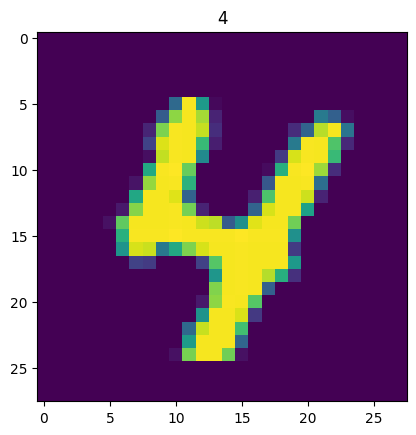

In [50]:
import matplotlib.pyplot as plt
image, label = train_data[42567]
print(f"Image shape: {image.shape}")
plt.title(label)
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

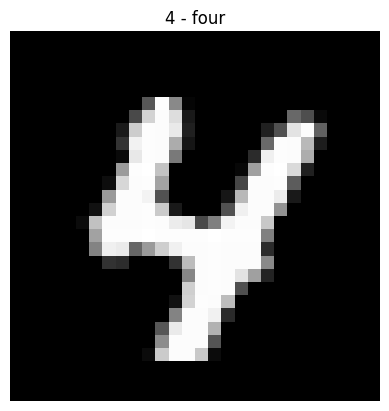

In [51]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

## Dataloader

In [52]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                         batch_size = BATCH_SIZE,
                         shuffle = True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78f03c01ae60>,
 <torch.utils.data.dataloader.DataLoader at 0x78f03bec4610>)

In [53]:
print(f"{train_dataloader}, {test_dataloader}")
print(f"train dataloader length: {len(train_dataloader)} with batch size of {BATCH_SIZE}")
print(f"test dataloader length: {len(test_dataloader)} with batch size of {BATCH_SIZE}")

<torch.utils.data.dataloader.DataLoader object at 0x78f03c01ae60>, <torch.utils.data.dataloader.DataLoader object at 0x78f03bec4610>
train dataloader length: 1875 with batch size of 32
test dataloader length: 313 with batch size of 32


In [54]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Imgae size: torch.Size([1, 28, 28])
Label 4, label_size: torch.Size([])


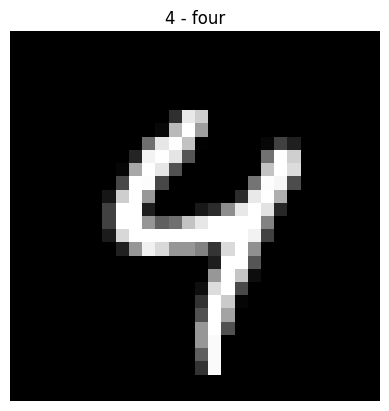

In [55]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Imgae size: {img.shape}")
print(f"Label {label}, label_size: {label.shape}")

## Replicate TinyVGG Architecture

out channels formula:
$$Out = ((N-F+2P)/S)+1$$

Where:
* N = input size
* F = filter size
* P = padding
* S = stride

In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [66]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int, # 1
               hidden_units: int, # 10
               output_shape: int): # 10
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3 ,padding = 1, stride = 1) # 28*28, 10
    self.pool = nn.MaxPool2d(2) # 14*14, 10
    self.conv2 = nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 1, stride = 1) # 14*14, 10
    self.flatten = nn.Flatten() # 7*7*10
    self.linear = nn.Linear(490, output_shape)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = self.flatten(x)
    x = self.linear(x)
    return x


In [67]:
torch.manual_seed(42)
tinyvgg_model = TinyVGG(input_shape = 1,
                        hidden_units = 10,
                        output_shape = len(class_names)).to(device)

In [68]:
# Set optimizer and loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = tinyvgg_model.parameters(),
                            lr = 0.1)

In [69]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [73]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
  Performs a training step with model to learn on data_loader
  """
  train_loss, train_acc = 0, 0
  model.train()

  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim = 1))
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")


In [75]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0

  # Put model on eval mode
  model.eval()
  # Turn on inference mode
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model(X)
      # 2. Caluclate the loss
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim = 1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

In [78]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model = tinyvgg_model,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = tinyvgg_model,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_time = train_time_end_on_gpu - train_time_start_on_gpu
print(f"\nTrain time on {device}: {total_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.04048 | Train acc: 98.72
Epoch: 1
-------
Train loss: 0.03824 | Train acc: 98.81
Epoch: 2
-------
Train loss: 0.03473 | Train acc: 98.90

Train time on cuda: 36.387 seconds


In [79]:
from tqdm.auto import tqdm
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  """
  Returns a dictionary contaning the results of model predicting on data_loader
  """
  loss, acc = 0, 0
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

    # Scale the loss and acc to find the average loss\acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


In [80]:
tinyvgg_results = eval_model(
    model = tinyvgg_model,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

tinyvgg_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'TinyVGG',
 'model_loss': 0.043434515595436096,
 'model_acc': 98.77196485623003}